# TFM: Aplicación de Modelo de Splines a series temporales financieras

### Idea general de nuestro analisis :

Un analisis exploratorio que se centra en predecir con modelos SPLINES la acción financiera de la empresa escogida la cual es NIKE junto con los rendimientos del mercado donde cotiza, que es S&P 500

# INDICE:
    1.EDA DE LOS DATOS DE NIKE Y DEL S&P 500
    
    2.REGRESIONES LOS RENDIMIENTOS DE NIKE CON LOS DEL S&P500
    
        2.1. DIARIAS
            2.1.1. MODELOS
                2.1.1.1. REGRESION SIMPLE
                2.1.1.2. POLYNOMIAL REGRESSION
                2.1.1.3. CUBIC REGRESSION
                2.1.1.4. NATURAL CUBIC REGRESION
            2.1.2. CONCLUSIONES
            
        2.2. SEMANALES
            2.2.1. MODELOS
                2.2.1.1. REGRESION SIMPLE
                2.2.1.2. POLYNOMIAL REGRESSION
                2.2.1.3. CUBIC REGRESSION
                2.2.1.4. NATURAL CUBIC REGRESION
            2.2.2. CONCLUSIONES
            
        2.3. MENSUALES
            2.3.1. MODELOS
                2.3.1.1. REGRESION SIMPLE
                2.3.1.2. POLYNOMIAL REGRESSION
                2.3.1.3. CUBIC REGRESSION
                2.3.1.4. NATURAL CUBIC REGRESION
            2.3.2. CONCLUSIONES
            
    3.REGRESIONES DE LOS RENDIMIENTOS DE NIKE JUNTO CON LOS DE SMB, HML Y S&P500
    
        3.1. DIARIAS
            3.1.1. MODELOS
                3.1.1.1. REGRESION SIMPLE
                3.1.1.2. POLYNOMIAL REGRESSION
                3.1.1.3. CUBIC REGRESSION
                3.1.1.4. NATURAL CUBIC REGRESION
            3.2.2 CONCLUSIONES.
            
        3.2. SEMANALES
            3.2.1. NULOS
            3.2.2. MODELOS
                3.2.2.1. REGRESION SIMPLE
                3.2.2.2. POLYNOMIAL REGRESSION
                3.2.2.3. CUBIC REGRESSION
                3.2.2.4. NATURAL CUBIC REGRESION
            3.2.4. CONCLUSIONES.
            
        3.3. MENSUALES
            3.3.1. MODELOS
                3.3.1.1. REGRESION SIMPLE
                3.3.1.2. POLYNOMIAL REGRESSION
                3.3.1.3. CUBIC REGRESSION
                3.3.1.4. NATURAL CUBIC REGRESION
            3.3.2. CONCLUSIONES.
            

## 1.EDA DE LOS DATOS DE NIKE Y DEL S&P 500

### Librerias

In [1]:
#IMPORTAR LIBRERIA

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from matplotlib.pyplot import *
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings


### Creacion de dataframes y verificacion de los datos a analizar dentro de los dataframes

Creamos un dataframe el cual tiene el conjunto de datos que se van a utilizar para training.

In [2]:
#Importamos los datos al notebook y comprobamos la dimension de nuestros datos.
pd_data = pd.read_csv("../TFMcodigo/data/raw/NKE.csv",sep =',')
pd_data.shape

(3276, 7)

In [3]:
pd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-22,16.142500,16.192499,16.007500,16.077499,13.766811,6864800
1,2010-02-23,16.075001,16.137501,15.902500,16.032499,13.728276,7738800
2,2010-02-24,16.000000,16.254999,16.000000,16.232500,13.899527,11618000
3,2010-02-25,16.252501,16.570000,16.002501,16.540001,14.162837,15967600
4,2010-02-26,16.557501,16.962500,16.557501,16.900000,14.471098,19633200


In [4]:
# Verificamos el tipo de datos que se encuentra dentro de cada columna del dataframe, para verificar si categorias actuales
# del dataset esten correctamente descritas para cada variable
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3276 non-null   object 
 1   Open       3276 non-null   float64
 2   High       3276 non-null   float64
 3   Low        3276 non-null   float64
 4   Close      3276 non-null   float64
 5   Adj Close  3276 non-null   float64
 6   Volume     3276 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.3+ KB


Como vemos, los datos obtenidos al verificar las caracteristicas y los valores que se encuentran en el set de datos es que las variables estan clasificadas como float64, tambien tenemos la varaible date como objeto y la de volumen que es una variable entera o int64.

### Verificación de datos duplicados y datos faltantes dentro del dataframe creado

#### - Verificacion de filas duplicadas dentro del dataframe

In [5]:
print(pd_data.shape, pd_data.drop_duplicates().shape)

(3276, 7) (3276, 7)


Podemos observar que no hay ninguna fila duplicada en nuestro dataFrame.

#### - Verificar de valores faltantes o nulos dentro del dataframe

In [6]:
#Verificacion de columnas con valores faltantes
null_columns=pd_data.isnull().sum().sort_values(ascending=False).rename("null_values").reset_index()
null_columns

,index,null_values
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0
5,Adj Close,0
6,Volume,0


Aseguramos que no hay ningún valor nulo o faltante.

In [7]:
#Verificacion de filas con valores faltantes
null_rows=pd_data.isnull().sum(axis = 1).sort_values(ascending=False)#.rename("null_values").reset_index()
null_rows.shape

(3276,)

Segun el analisis de nulos, se puede ver que en el dataset no existe ningun dato nulo ni en las filas ni en las columnas, que tenga que ser tratado en este analisis exploratorio de datos

### EDA de los datos de S&P500

In [8]:
#Cargamos el csv donde se encuentran los datos del S&P500.
syp_data = pd.read_excel("../TFMcodigo/data/raw/syp500.xlsx")
syp_data.head()

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen
0,2010-02-22,1110.00,1112.29,1105.38,1108.01,1108.01,3814440000
1,2010-02-23,1107.49,1108.58,1092.18,1094.60,1094.60,4521050000
2,2010-02-24,1095.89,1106.42,1095.50,1105.24,1105.24,4168360000
3,2010-02-25,1101.24,1103.50,1086.02,1102.94,1102.94,4521130000
4,2010-02-26,1103.10,1107.24,1097.56,1104.49,1104.49,3945190000


### Verificación de datos duplicados y datos faltantes dentro del dataframe creado

#### - Verificacion de filas duplicadas dentro del dataframe

In [9]:
print(syp_data.shape, syp_data.drop_duplicates().shape)

(3276, 7) (3276, 7)


No hay duplicados

#### - Verificar de valores faltantes o nulos dentro del dataframe

In [10]:
#Verificacion de columnas con valores faltantes
null_columns=syp_data.isnull().sum().sort_values(ascending=False).rename("null_values").reset_index()
null_columns

,index,null_values
0,Fecha,0
1,Abrir,0
2,Máx.,0
3,Mín.,0
4,Cierre,0
5,Cierre ajus.,0
6,Volumen,0


no hay valores nulos o faltantes

### MEDIMOS LOS RENDIMIENTOS DIARIOS DE S&P 500

In [11]:
syp_data['rendimientos'] = np.log(syp_data['Cierre'] / syp_data['Cierre'].shift(1))
syp_data.head()

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos
0,2010-02-22,1110.00,1112.29,1105.38,1108.01,1108.01,3814440000,NaN
1,2010-02-23,1107.49,1108.58,1092.18,1094.60,1094.60,4521050000,-0.012177
2,2010-02-24,1095.89,1106.42,1095.50,1105.24,1105.24,4168360000,0.009674
3,2010-02-25,1101.24,1103.50,1086.02,1102.94,1102.94,4521130000,-0.002083
4,2010-02-26,1103.10,1107.24,1097.56,1104.49,1104.49,3945190000,0.001404


In [12]:
# Calcular la media de los rendimientos
media_rendimientos = syp_data['rendimientos'].mean()

# Rellenar el valor NaN con la media de los rendimientos
syp_data['rendimientos'] = syp_data['rendimientos'].fillna(media_rendimientos)
syp_data.head()

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos
0,2010-02-22,1110.00,1112.29,1105.38,1108.01,1108.01,3814440000,0.000394
1,2010-02-23,1107.49,1108.58,1092.18,1094.60,1094.60,4521050000,-0.012177
2,2010-02-24,1095.89,1106.42,1095.50,1105.24,1105.24,4168360000,0.009674
3,2010-02-25,1101.24,1103.50,1086.02,1102.94,1102.94,4521130000,-0.002083
4,2010-02-26,1103.10,1107.24,1097.56,1104.49,1104.49,3945190000,0.001404


In [13]:
#syp_data.to_csv('syp_data.csv')

### SACAMOS LOS RENDIMIENTOS DIARIOS DEL PRECIO DE CIERRE DE LAS ACCIONES DE NIKE

In [14]:
pd_data['rendimientosNIKE'] = np.log(pd_data['Close'] / pd_data['Close'].shift(1))
pd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
0,2010-02-22,16.142500,16.192499,16.007500,16.077499,13.766811,6864800,NaN
1,2010-02-23,16.075001,16.137501,15.902500,16.032499,13.728276,7738800,-0.002803
2,2010-02-24,16.000000,16.254999,16.000000,16.232500,13.899527,11618000,0.012398
3,2010-02-25,16.252501,16.570000,16.002501,16.540001,14.162837,15967600,0.018766
4,2010-02-26,16.557501,16.962500,16.557501,16.900000,14.471098,19633200,0.021532


In [15]:
# Calcular la media de los rendimientos
media_rendimientos_pd = pd_data['rendimientosNIKE'].mean()

# Rellenar el valor NaN con la media de los rendimientos
pd_data['rendimientosNIKE'] = pd_data['rendimientosNIKE'].fillna(media_rendimientos_pd)
pd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
0,2010-02-22,16.142500,16.192499,16.007500,16.077499,13.766811,6864800,0.000609
1,2010-02-23,16.075001,16.137501,15.902500,16.032499,13.728276,7738800,-0.002803
2,2010-02-24,16.000000,16.254999,16.000000,16.232500,13.899527,11618000,0.012398
3,2010-02-25,16.252501,16.570000,16.002501,16.540001,14.162837,15967600,0.018766
4,2010-02-26,16.557501,16.962500,16.557501,16.900000,14.471098,19633200,0.021532


In [16]:
#pd_data.to_csv('pd_data.csv')

# 2.REGRESIONES LOS RENDIMIENTOS DE NIKE CON LOS DEL S&P500

## 2.1. REGRESIONES DIARIA con s&p 500

In [17]:
X = syp_data[['rendimientos']]#x = sp500, SMB, HML estas somn los splines 
y = pd_data[['rendimientosNIKE']] #NIKE es la y

In [18]:
#Dividimos el data frame en train y test, donde el train es un 70% de los datos totales
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## 2.1.1. MODELOS

### 2.1.1.1. REGRESION SIMPLE

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
#lm.coef_ y lm.intercept_ definen la ecuación de la recta de regresión lineal, 
#la cual se utiliza para predecir los valores de la variable dependiente 
#en función de los valores de las variables predictoras.
#La beta de esta regresión simple es de 0.97. esto quiere decir que cuando el mercado sube 1 las acciones de Nike
#suben 0.97.
print(lm.coef_)
print(lm.intercept_)

[[0.97676669]]
[0.00022224]


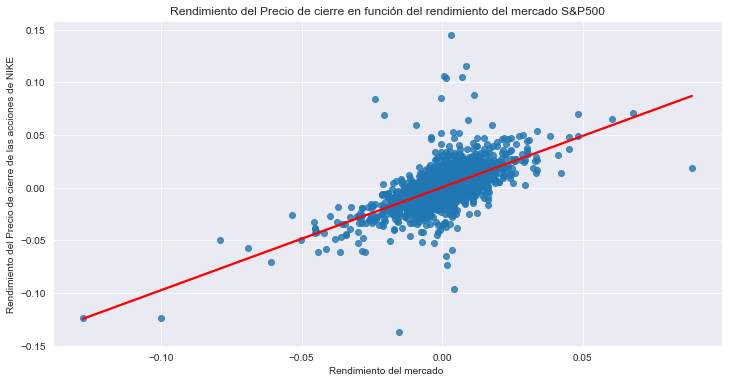

In [21]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

sns.regplot(y=y_train['rendimientosNIKE'], 
            x=X_train['rendimientos'], 
            ci=None, 
            line_kws={"color": "red"})

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimiento del mercado ') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [22]:
from sklearn.metrics import mean_squared_error
# Training data
pred_train = lm.predict(X_train)
rmse_train = mean_squared_error(y_train, pred_train, squared=False)

# Test data
pred_test = lm.predict(X_test)
rmse_test =mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_lm = pd.DataFrame(
    {
    "model": "Linear Model (lm)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test],
    })
model_results_lm

,model,rmse_train,rmse_test
0,Linear Model (lm),0.013514,0.012415


### 2.1.1.2. Polinomial Regresssion

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [24]:
pm = LinearRegression()
pm.fit(X_train_poly,y_train)

LinearRegression()

In [25]:
# Obtener los coeficientes del modelo
coeficientes_polynomial = pm.coef_

print(coeficientes_polynomial)

[[ 0.          0.96650273 -0.87630216]]


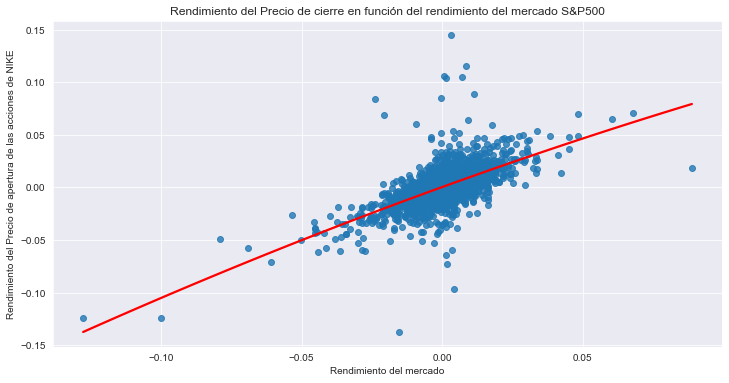

In [26]:
#Gráfico
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura
# plot
sns.regplot(y=y_train['rendimientosNIKE'], 
            x=X_train['rendimientos'], 
            ci=None, 
            order=2, 
            line_kws={"color": "red"});
plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimiento del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de apertura de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [27]:
# Training data

pred_train = pm.predict(X_train_poly) 
rmse_train = mean_squared_error(y_train, 
                                pred_train, 
                                squared=False)

# Test data
pred_test = pm.predict(X_test_poly)
rmse_test =mean_squared_error(y_test, 
                              pred_test, 
                              squared=False)

# Save model results
model_results_pm = pd.DataFrame(
    {
    "model": "Polynomial Model (pm)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test],
    })

results = pd.concat([model_results_lm, model_results_pm], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.013514,0.012415
0,Polynomial Model (pm),0.013506,0.012451


### 2.1.1.3. CUBIC SPLINES

In [28]:
from patsy import dmatrix
# Generación de spline cúbico con 3 nudos a 25, 50 y 75
knots = np.percentile(X_train, [25, 50, 75]) 
transformed_x = dmatrix(
            "bs(train, knots=knots, degree=3, include_intercept=False)", 
                {"train": X_train},return_type='dataframe') 

In [29]:
transformed_x.head()

,Intercept,"bs(train, knots=knots, degree=3, include_intercept=False)[0]","bs(train, knots=knots, degree=3, include_intercept=False)[1]","bs(train, knots=knots, degree=3, include_intercept=False)[2]","bs(train, knots=knots, degree=3, include_intercept=False)[3]","bs(train, knots=knots, degree=3, include_intercept=False)[4]","bs(train, knots=knots, degree=3, include_intercept=False)[5]"
1236,1.0,0.000000,0.011092,0.950080,0.038811,0.000017,0.000000e+00
1026,1.0,0.000000,0.000000,0.835981,0.160084,0.003935,7.376677e-08
250,1.0,0.000000,0.000000,0.829465,0.166108,0.004427,3.127520e-07
2066,1.0,0.000000,0.001733,0.911778,0.085938,0.000551,0.000000e+00
1488,1.0,0.018457,0.246645,0.734634,0.000000,0.000000,0.000000e+00


La tabla muestra los valores de intercepto y coeficientes de cinco modelos de regresión. Cada modelo utiliza una función de base cúbica para ajustar una relación no lineal entre una variable de entrada y una variable de salida.

En general, se puede observar que el valor del intercepto es 1.0 en todos los modelos, lo que indica que el valor de la variable de salida es igual al valor del intercepto cuando la variable de entrada es igual a cero. Los valores de los coeficientes varían de un modelo a otro y representan la contribución de cada función de base a la predicción de la variable de salida.

En el primer modelo, la función de base con el mayor coeficiente es la tercera función, lo que sugiere que esta función tiene la mayor influencia en la predicción de la variable de salida.

En el segundo y tercer modelo, la función de base con el mayor coeficiente es la cuarta función, lo que sugiere que esta función es la más importante en la predicción de la variable de salida.

En el cuarto y quinto modelo, las funciones de base con los coeficientes más altos son la tercera y la cuarta, lo que indica que estas funciones tienen una mayor influencia en la predicción de la variable de salida.

En resumen, la elección de las funciones de base y sus coeficientes depende del modelo específico y de la relación no lineal entre la variable de entrada y la variable de salida. Estos modelos pueden ser útiles para predecir valores nuevos y pueden ser mejorados mediante la selección de diferentes funciones de base o mediante la incorporación de otras variables de entrada.

In [30]:
import statsmodels.api as sm
# Ajuste del modelo lineal generalizado en el conjunto de datos transformado
cs = sm.GLM(y_train, transformed_x).fit() 

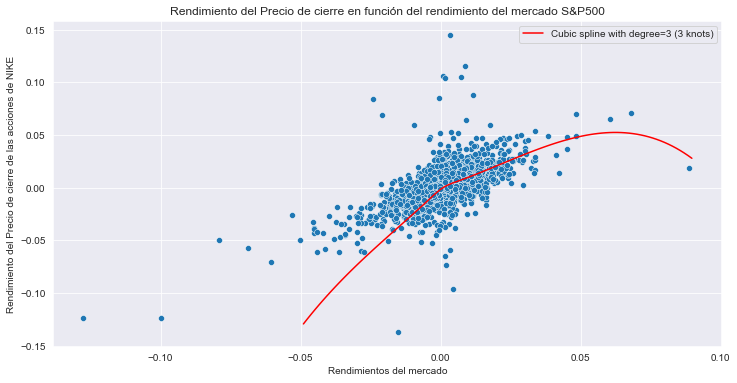

In [31]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

# Create observations
xp = np.linspace(X_test.min(),X_test.max(), 100) 
# Make some predictions
pred = cs.predict(dmatrix("bs(xp, knots=knots, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# plot
sns.scatterplot(y=y_train['rendimientosNIKE'], x=X_train['rendimientos'])

plt.plot(xp, pred, label='Cubic spline with degree=3 (3 knots)', color='red')
plt.legend();

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimientos del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [32]:
coeficientes_cubic_spline = cs.params

beta_rendimientos = coeficientes_cubic_spline
print("Beta para rendimientos:", beta_rendimientos)

Beta para rendimientos: Intercept                                                      -0.129421
bs(train, knots=knots, degree=3, include_intercept=False)[0]    0.051376
bs(train, knots=knots, degree=3, include_intercept=False)[1]    0.084563
bs(train, knots=knots, degree=3, include_intercept=False)[2]    0.130674
bs(train, knots=knots, degree=3, include_intercept=False)[3]    0.158496
bs(train, knots=knots, degree=3, include_intercept=False)[4]    0.212098
bs(train, knots=knots, degree=3, include_intercept=False)[5]    0.157214
dtype: float64


In [33]:
# Training data
pred_train = cs.predict(dmatrix("bs(train, knots=knots, include_intercept=False)", {"train": X_train}, return_type='dataframe'))#### CAMBIO ####
rmse_train = mean_squared_error(y_train, pred_train, squared=False) 

# Test data
pred_test = cs.predict(dmatrix("bs(test, knots=knots, include_intercept=False)", {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_cs = pd.DataFrame(
    {
    "model": "Cubic spline (cs)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test]
    })
results = pd.concat([results, model_results_cs], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.013514,0.012415
0,Polynomial Model (pm),0.013506,0.012451
0,Cubic spline (cs),0.013447,0.016945


### 2.1.1.4. NATURAL CUBIC SPLINE

In [34]:
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')

ncs = sm.GLM(y_train, transformed_x3).fit() 

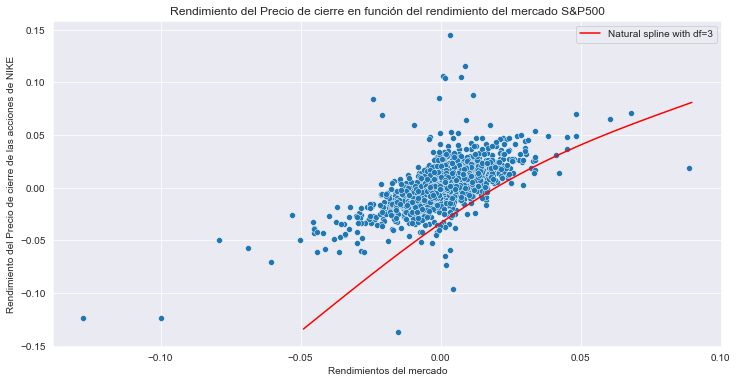

In [35]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

# Make predictions
pred = ncs.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# plot
sns.scatterplot(y=y_train['rendimientosNIKE'], x=X_train['rendimientos'])
plt.plot(xp, pred, color='red', label='Natural spline with df=3')
plt.legend();

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimientos del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [36]:
# Obtener los coeficientes estimados (betas)
coeficientes_beta = ncs.params

print(coeficientes_beta)

Intercept            -0.013106
cr(train, df=3)[0]   -0.121161
cr(train, df=3)[1]    0.014107
cr(train, df=3)[2]    0.093948
dtype: float64


In [37]:
# Training data

pred_train = ncs.predict(dmatrix("cr(train, df=3)", {"train": X_train}, return_type='dataframe'))
rmse_train = mean_squared_error(y_train, pred_train, squared=False) 

# Test data
pred_test = ncs.predict(dmatrix("cr(test, df=3)", {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_ncs = pd.DataFrame(
    {
    "model": "Natural cubic spline (ncs)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test]
    })

results = pd.concat([results, model_results_ncs], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.013514,0.012415
0,Polynomial Model (pm),0.013506,0.012451
0,Cubic spline (cs),0.013447,0.016945
0,Natural cubic spline (ncs),0.013508,0.017246


## 2.1.2 Conclusión

La tabla muestra los resultados de diferentes modelos de regresión ajustados a los datos con respecto a su rendimiento en el conjunto de entrenamiento (rmse_train) y en el conjunto de prueba (rmse_test). Aquí hay una interpretación de los resultados:

-Linear Model (lm): Este es un modelo de regresión lineal. Tiene un RMSE (Root Mean Square Error) de aproximadamente 0.0135 en el conjunto de entrenamiento y 0.0124 en el conjunto de prueba.

-Polynomial Model (pm): Este es un modelo de regresión polinómica. Tiene resultados similares al modelo lineal, con un RMSE de aproximadamente 0.0135 en el conjunto de entrenamiento y 0.0125 en el conjunto de prueba.

-Cubic spline (cs): Este es un modelo de spline cúbico. Muestra un RMSE de aproximadamente 0.0134 en el conjunto de entrenamiento y 0.0169 en el conjunto de prueba. Parece que este modelo se ajusta un poco mejor en el conjunto de prueba en comparación con los modelos anteriores.

-Natural cubic spline (ncs): Este es un modelo de spline cúbico natural. Tiene un RMSE de aproximadamente 0.0135 en el conjunto de entrenamiento y 0.0172 en el conjunto de prueba. Los resultados son similares a los del modelo polinómico y lineal.

En general, parece que tanto el modelo lineal como el modelo polinómico tienen un rendimiento similar, y los modelos de spline cúbico (tanto el cúbico regular como el natural) tienen resultados ligeramente mejores en el conjunto de prueba. Sin embargo, las diferencias en los RMSE no son significativas entre estos modelos. Es importante tener en cuenta que la elección del modelo depende de otros factores además del RMSE, como la interpretación del modelo y la complejidad.

## 2.2. DATOS SEMANALES

In [38]:
import pandas as pd

# Establecer "Fecha" como índice
syp_data = syp_data.set_index('Fecha')

# Agrupar por semana y aplicar la media para cada columna
syp_data_weekly = syp_data.resample('W').mean()

# Reiniciar el índice y mostrar el DataFrame resultante
syp_data_weekly = syp_data_weekly.reset_index()
print(syp_data_weekly)

         Fecha     Abrir      Máx.       Mín.     Cierre  Cierre ajus.  \
0   2010-02-28  1103.544  1107.606  1095.3280  1103.0560     1103.0560   
1   2010-03-07  1117.194  1125.664  1116.0460  1122.8960     1122.8960   
2   2010-03-14  1142.370  1147.666  1139.5440  1144.9580     1144.9580   
3   2010-03-21  1158.422  1163.614  1153.6460  1160.3820     1160.3820   
4   2010-03-28  1166.806  1174.040  1161.8580  1168.0040     1168.0040   
..         ...       ...       ...        ...        ...           ...   
674 2023-01-29  4010.478  4047.712  3994.4960  4036.7940     4036.7940   
675 2023-02-05  4087.112  4133.552  4067.6860  4105.9640     4105.9640   
676 2023-02-12  4118.312  4141.722  4084.7800  4112.9800     4112.9800   
677 2023-02-19  4106.992  4132.966  4085.8200  4118.1040     4118.1040   
678 2023-02-26  4025.820  4034.555  3980.5925  4006.2325     4006.2325   

          Volumen  rendimientos  
0    4.194034e+09     -0.000558  
1    4.002330e+09      0.006101  
2    4.80

In [39]:
#syp_data_weekly.to_csv('syp_data_weekly.csv')

Cargamos los datos semanales del data frame de s&p 500

In [40]:
syp_data_Week = pd.read_csv("../TFMcodigo/data/raw/syp_data_weekly.csv")
syp_data_Week.head()

,Unnamed: 0,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos
0,0,2010-02-28,1103.544,1107.606,1095.328,1103.056,1103.056,4.194034e+09,-0.000558
1,1,2010-03-07,1117.194,1125.664,1116.046,1122.896,1122.896,4.002330e+09,0.006101
2,2,2010-03-14,1142.370,1147.666,1139.544,1144.958,1144.958,4.805318e+09,0.001973
3,3,2010-03-21,1158.422,1163.614,1153.646,1160.382,1160.382,4.588800e+09,0.001716
4,4,2010-03-28,1166.806,1174.040,1161.858,1168.004,1168.004,4.751278e+09,0.001150


In [41]:
syp_data_Week = syp_data_Week.drop('Unnamed: 0', axis=1)


In [42]:
syp_data_Week.head()

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos
0,2010-02-28,1103.544,1107.606,1095.328,1103.056,1103.056,4.194034e+09,-0.000558
1,2010-03-07,1117.194,1125.664,1116.046,1122.896,1122.896,4.002330e+09,0.006101
2,2010-03-14,1142.370,1147.666,1139.544,1144.958,1144.958,4.805318e+09,0.001973
3,2010-03-21,1158.422,1163.614,1153.646,1160.382,1160.382,4.588800e+09,0.001716
4,2010-03-28,1166.806,1174.040,1161.858,1168.004,1168.004,4.751278e+09,0.001150


A continuación cambiamos los datos diarios del data frame de NIKE

In [43]:
print(pd_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'rendimientosNIKE'],
      dtype='object')


In [44]:
pd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
0,2010-02-22,16.142500,16.192499,16.007500,16.077499,13.766811,6864800,0.000609
1,2010-02-23,16.075001,16.137501,15.902500,16.032499,13.728276,7738800,-0.002803
2,2010-02-24,16.000000,16.254999,16.000000,16.232500,13.899527,11618000,0.012398
3,2010-02-25,16.252501,16.570000,16.002501,16.540001,14.162837,15967600,0.018766
4,2010-02-26,16.557501,16.962500,16.557501,16.900000,14.471098,19633200,0.021532


In [45]:
pd_data = pd_data.reset_index()

In [46]:
pd_data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
0,0,2010-02-22,16.142500,16.192499,16.007500,16.077499,13.766811,6864800,0.000609
1,1,2010-02-23,16.075001,16.137501,15.902500,16.032499,13.728276,7738800,-0.002803
2,2,2010-02-24,16.000000,16.254999,16.000000,16.232500,13.899527,11618000,0.012398
3,3,2010-02-25,16.252501,16.570000,16.002501,16.540001,14.162837,15967600,0.018766
4,4,2010-02-26,16.557501,16.962500,16.557501,16.900000,14.471098,19633200,0.021532


In [47]:
pd_data = pd_data.drop('index', axis=1)


In [48]:
# Convertir la columna "Date" en formato de fecha
pd_data['Date'] = pd.to_datetime(pd_data['Date'])

# Establecer la columna "Date" como índice
pd_data = pd_data.set_index('Date')

# Agrupar los datos por semana y obtener la media semanal
pd_data_weekly = pd_data.resample('W').mean()

# Reiniciar el índice del nuevo dataframe
pd_data_weekly = pd_data_weekly.reset_index()

In [49]:
pd_data_weekly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
0,2010-02-28,16.205501,16.4235,16.0940,16.356500,14.005710,12364480.0,0.010100
1,2010-03-07,16.976000,17.0790,16.8910,16.993000,14.574060,8591120.0,0.002119
2,2010-03-14,17.208000,17.3615,17.1515,17.326000,14.895330,6577520.0,0.004573
3,2010-03-21,17.904000,18.1390,17.8260,17.991500,15.467465,19371680.0,0.010098
4,2010-03-28,18.480500,18.6335,18.3350,18.460499,15.870668,10346880.0,0.001004


In [50]:
#pd_data_weekly.to_csv('pd_data_weekly.csv')

# REGRESIONES SEMANALES con s&p 500

In [51]:
y = pd_data_weekly[['rendimientosNIKE']]
X = syp_data_Week[['rendimientos']]

In [52]:
#Dividimos el data frame en train y test, donde el train es un 70% de los datos totales
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## 2.2.1. MODELOS

### 2.2.1.1REGRESION SIMPLES

In [53]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
#lm.coef_ y lm.intercept_ definen la ecuación de la recta de regresión lineal, 
#la cual se utiliza para predecir los valores de la variable dependiente 
#en función de los valores de las variables predictoras.
print(lm.coef_) #Beta de la regresión lineal semanal.
print(lm.intercept_)

[[1.03487586]]
[0.00010796]


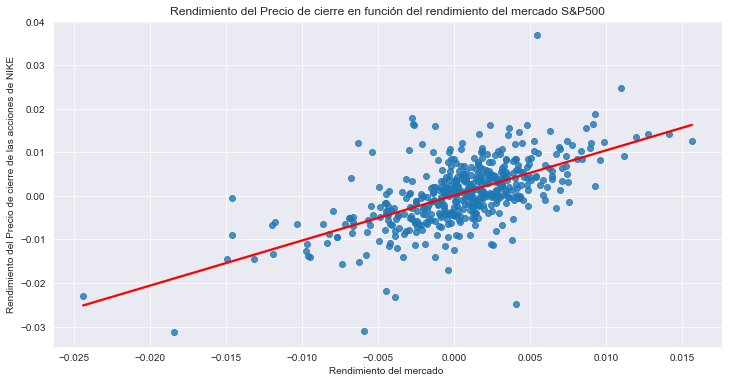

In [55]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

sns.regplot(y=y_train['rendimientosNIKE'], 
            x=X_train['rendimientos'], 
            ci=None, 
            line_kws={"color": "red"})

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimiento del mercado ') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [56]:
# Training data
pred_train = lm.predict(y_train)
rmse_train = mean_squared_error(X_train, pred_train, squared=False)

# Test data
pred_test = lm.predict(y_test)
rmse_test =mean_squared_error(X_test, pred_test, squared=False)

# Save model results
model_results_lm = pd.DataFrame(
    {
    "model": "Linear Model (lm)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test],
    })
model_results_lm

/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- rendimientosNIKE
Feature names seen at fit time, yet now missing:
- rendimientos

  warnings.warn(message, FutureWarning)
/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- rendimientosNIKE
Feature names seen at fit time, yet now missing:
- rendimientos

  warnings.warn(message, FutureWarning)


,model,rmse_train,rmse_test
0,Linear Model (lm),0.006056,0.005689


### 2.2.1.2. POLYNOMIAL REGRESSION

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [58]:
pm = LinearRegression()
pm.fit(X_train_poly,y_train)

LinearRegression()

In [59]:
# Obtener los coeficientes del modelo
coeficientes_polynomial = pm.coef_

print(coeficientes_polynomial)

[[0.         1.04355283 3.51666375]]


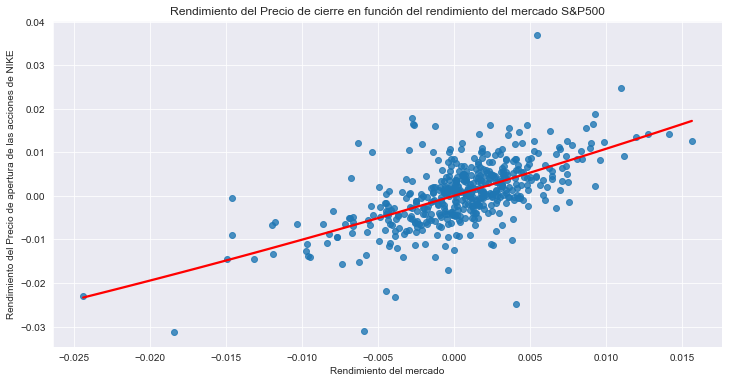

In [60]:
#Gráfico
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura
# plot
sns.regplot(y=y_train['rendimientosNIKE'], 
            x=X_train['rendimientos'], 
            ci=None, 
            order=2, 
            line_kws={"color": "red"});
plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimiento del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de apertura de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [61]:
# Training data

pred_train = pm.predict(X_train_poly) 
rmse_train = mean_squared_error(y_train, 
                                pred_train, 
                                squared=False)

# Test data
pred_test = pm.predict(X_test_poly)
rmse_test =mean_squared_error(y_test, 
                              pred_test, 
                              squared=False)

# Save model results
model_results_pm = pd.DataFrame(
    {
    "model": "Polynomial Model (pm)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test],
    })

results = pd.concat([model_results_lm, model_results_pm], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.006056,0.005689
0,Polynomial Model (pm),0.005837,0.005447


### 2.2.1.3. CUBIC SPLINES

In [62]:
from patsy import dmatrix
# Generación de spline cúbico con 3 nudos a 25, 50 y 75
knots = np.percentile(X_train, [25, 50, 75]) 
transformed_x = dmatrix(
            "bs(train, knots=knots, degree=3, include_intercept=False)", 
                {"train": X_train},return_type='dataframe') 

In [63]:
transformed_x.head()

,Intercept,"bs(train, knots=knots, degree=3, include_intercept=False)[0]","bs(train, knots=knots, degree=3, include_intercept=False)[1]","bs(train, knots=knots, degree=3, include_intercept=False)[2]","bs(train, knots=knots, degree=3, include_intercept=False)[3]","bs(train, knots=knots, degree=3, include_intercept=False)[4]","bs(train, knots=knots, degree=3, include_intercept=False)[5]"
547,1.0,0.000000,0.012983,0.837891,0.148345,0.000781,0.000000
197,1.0,0.000328,0.096407,0.883829,0.019436,0.000000,0.000000
40,1.0,0.000000,0.000000,0.287155,0.508777,0.192421,0.011647
274,1.0,0.016682,0.285491,0.697809,0.000000,0.000000,0.000000
5,1.0,0.000000,0.000528,0.701308,0.287573,0.010592,0.000000


En esta tabla se presentan los valores del intercepto y de los coeficientes correspondientes a cada una de las funciones base utilizadas en un modelo de regresión lineal con knots en diferentes puntos. Los valores indican la contribución de cada función base a la predicción de la variable respuesta.

En este caso, parece que las funciones base se han definido utilizando una combinación de knots y grado 3. En general, se observa que la mayoría de los coeficientes son muy pequeños en comparación con el intercepto, lo que indica que la contribución de cada función base a la predicción es bastante limitada. Sin embargo, algunos coeficientes son más grandes que otros, lo que sugiere que ciertas funciones base son más importantes para la predicción que otras.

En resumen, esta tabla proporciona información sobre la importancia relativa de cada función base en un modelo de regresión lineal con knots en diferentes puntos.

In [64]:
import statsmodels.api as sm
# Ajuste del modelo lineal generalizado en el conjunto de datos transformado

cs = sm.GLM(y_train, transformed_x).fit()

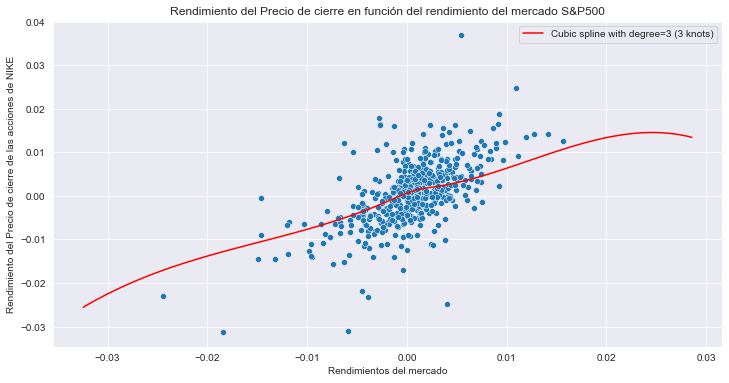

In [65]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

# Create observations
xp = np.linspace(X_test.min(),X_test.max(), 100) 
# Make some predictions
pred = cs.predict(dmatrix("bs(xp, knots=knots, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# plot
sns.scatterplot(y=y_train['rendimientosNIKE'], x=X_train['rendimientos'])

plt.plot(xp, pred, label='Cubic spline with degree=3 (3 knots)', color='red')
plt.legend();

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimientos del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [66]:
coeficientes_cubic_spline = cs.params

beta_rendimientos = coeficientes_cubic_spline
print("Beta para rendimientos:", beta_rendimientos)

Beta para rendimientos: Intercept                                                      -0.025581
bs(train, knots=knots, degree=3, include_intercept=False)[0]    0.013911
bs(train, knots=knots, degree=3, include_intercept=False)[1]    0.014242
bs(train, knots=knots, degree=3, include_intercept=False)[2]    0.027075
bs(train, knots=knots, degree=3, include_intercept=False)[3]    0.029533
bs(train, knots=knots, degree=3, include_intercept=False)[4]    0.043980
bs(train, knots=knots, degree=3, include_intercept=False)[5]    0.039007
dtype: float64


In [67]:
# Training data

pred_train = cs.predict(dmatrix("bs(train, knots=knots, include_intercept=False)", {"train": X_train}, return_type='dataframe'))#### CAMBIO ####
rmse_train = mean_squared_error(y_train, pred_train, squared=False) 

# Test data
pred_test = cs.predict(dmatrix("bs(test, knots=knots, include_intercept=False)", {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False) 

# Save model results
model_results_cs = pd.DataFrame(
    {
    "model": "Cubic spline (cs)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test]
    })
results = pd.concat([results, model_results_cs], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.006056,0.005689
0,Polynomial Model (pm),0.005837,0.005447
0,Cubic spline (cs),0.005821,0.005752


### 2.2.1.4. NATURAL CUBIC SPLINE

In [68]:
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')#### CAMBIO ####

ncs = sm.GLM(y_train, transformed_x3).fit() 

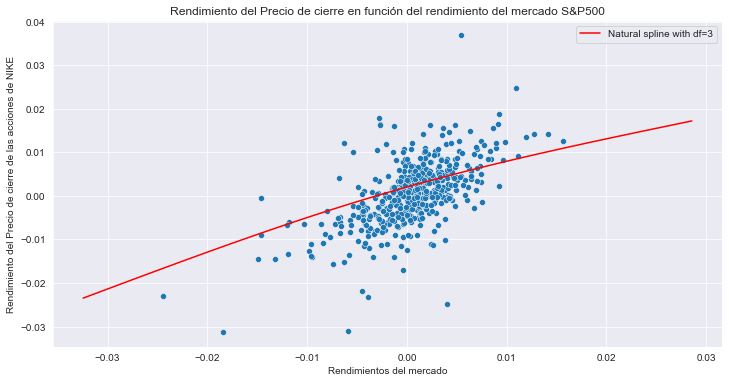

In [69]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

# Make predictions
pred = ncs.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# plot
sns.scatterplot(y=y_train['rendimientosNIKE'], x=X_train['rendimientos'])
plt.plot(xp, pred, color='red', label='Natural spline with df=3')
plt.legend();

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimientos del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [70]:
# Obtener los coeficientes estimados (betas)
coeficientes_beta = ncs.params

print(coeficientes_beta)

Intercept            -0.001384
cr(train, df=3)[0]   -0.022092
cr(train, df=3)[1]    0.002136
cr(train, df=3)[2]    0.018572
dtype: float64


In [71]:
# Training data

pred_train = ncs.predict(dmatrix("cr(train, df=3)", {"train": X_train}, return_type='dataframe'))
rmse_train = mean_squared_error(y_train, pred_train, squared=False) 

# Test data
pred_test = ncs.predict(dmatrix("cr(test, df=3)", {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_ncs = pd.DataFrame(
    {
    "model": "Natural cubic spline (ncs)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test]
    })

results = pd.concat([results, model_results_ncs], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.006056,0.005689
0,Polynomial Model (pm),0.005837,0.005447
0,Cubic spline (cs),0.005821,0.005752
0,Natural cubic spline (ncs),0.005837,0.005814


## 2.2.2. CONCLUSION

Aquí está la interpretación de los resultados:

-Linear Model (lm): En el conjunto de entrenamiento, este modelo de regresión lineal tiene un RMSE de aproximadamente 0.0061, y en el conjunto de prueba, el RMSE es de alrededor de 0.0057. Esto sugiere que el modelo es capaz de predecir los rendimientos semanales con bastante precisión.

-Polynomial Model (pm): Este modelo de regresión polinómica muestra un rendimiento ligeramente mejor. Tiene un RMSE de alrededor de 0.0058 en el conjunto de entrenamiento y 0.0054 en el conjunto de prueba. Parece que la capacidad de generalización a nuevos datos es buena.

-Cubic spline (cs): El modelo de spline cúbico también se desempeña bien en este conjunto de datos. El RMSE es de aproximadamente 0.0058 en el conjunto de entrenamiento y 0.0058 en el conjunto de prueba. Esto indica que el modelo es capaz de capturar patrones semanales en los rendimientos.

-Natural cubic spline (ncs): Al igual que el modelo polinómico, el modelo de spline cúbico natural tiene un RMSE de aproximadamente 0.0058 tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En general, todos los modelos muestran un buen rendimiento en la predicción de los rendimientos semanales. Las diferencias en los RMSE entre los modelos son pequeñas, lo que indica que tienen una capacidad similar para generalizar a nuevos datos.

## 3.2. DATOS MENSUALES

In [72]:
syp_data.head()

,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos
Fecha,,,,,,,
2010-02-22,1110.00,1112.29,1105.38,1108.01,1108.01,3814440000,0.000394
2010-02-23,1107.49,1108.58,1092.18,1094.60,1094.60,4521050000,-0.012177
2010-02-24,1095.89,1106.42,1095.50,1105.24,1105.24,4168360000,0.009674
2010-02-25,1101.24,1103.50,1086.02,1102.94,1102.94,4521130000,-0.002083
2010-02-26,1103.10,1107.24,1097.56,1104.49,1104.49,3945190000,0.001404


In [73]:
syp_data = syp_data.reset_index()

In [74]:
syp_data.head()

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos
0,2010-02-22,1110.00,1112.29,1105.38,1108.01,1108.01,3814440000,0.000394
1,2010-02-23,1107.49,1108.58,1092.18,1094.60,1094.60,4521050000,-0.012177
2,2010-02-24,1095.89,1106.42,1095.50,1105.24,1105.24,4168360000,0.009674
3,2010-02-25,1101.24,1103.50,1086.02,1102.94,1102.94,4521130000,-0.002083
4,2010-02-26,1103.10,1107.24,1097.56,1104.49,1104.49,3945190000,0.001404


In [75]:
# Convertir la columna de fecha en tipo datetime
syp_data['Fecha'] = pd.to_datetime(syp_data['Fecha'])

# Agrupar los datos por mes y obtener los valores promedio
syp_data_mensual = syp_data.groupby(pd.Grouper(key='Fecha', freq='M')).mean()

# Reiniciar el índice
syp_data_mensual = syp_data_mensual.reset_index()

# Imprimir los primeros cinco registros
print(syp_data_mensual.head())

       Fecha        Abrir         Máx.         Mín.       Cierre  \
0 2010-02-28  1103.544000  1107.606000  1095.328000  1103.056000   
1 2010-03-31  1149.442174  1155.746087  1145.994348  1152.048696   
2 2010-04-30  1196.390952  1202.634286  1189.531429  1197.316190   
3 2010-05-31  1129.105000  1139.656000  1109.045000  1125.062000   
4 2010-06-30  1086.281818  1095.199545  1074.715909  1083.360909   

   Cierre ajus.       Volumen  rendimientos  
0   1103.056000  4.194034e+09     -0.000558  
1   1152.048696  4.507980e+09      0.002484  
2   1197.316190  5.559139e+09      0.000698  
3   1125.062000  6.383139e+09     -0.004277  
4   1083.360909  5.004852e+09     -0.002518  


In [76]:
#syp_data_mensual.to_csv('syp_data_mensual.csv')

In [77]:
syp_data_mensual = pd.read_csv("../TFMcodigo/data/raw/syp_data_mensual.csv")
syp_data_mensual.head()

,Unnamed: 0,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos
0,0,2010-02-28,1103.544000,1107.606000,1095.328000,1103.056000,1103.056000,4.194034e+09,-0.000558
1,1,2010-03-31,1149.442174,1155.746087,1145.994348,1152.048696,1152.048696,4.507980e+09,0.002484
2,2,2010-04-30,1196.390952,1202.634286,1189.531429,1197.316190,1197.316190,5.559139e+09,0.000698
3,3,2010-05-31,1129.105000,1139.656000,1109.045000,1125.062000,1125.062000,6.383139e+09,-0.004277
4,4,2010-06-30,1086.281818,1095.199545,1074.715909,1083.360909,1083.360909,5.004852e+09,-0.002518


In [78]:
syp_data_mensual = syp_data_mensual.drop('Unnamed: 0', axis=1)

In [79]:
syp_data_mensual.head()

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos
0,2010-02-28,1103.544000,1107.606000,1095.328000,1103.056000,1103.056000,4.194034e+09,-0.000558
1,2010-03-31,1149.442174,1155.746087,1145.994348,1152.048696,1152.048696,4.507980e+09,0.002484
2,2010-04-30,1196.390952,1202.634286,1189.531429,1197.316190,1197.316190,5.559139e+09,0.000698
3,2010-05-31,1129.105000,1139.656000,1109.045000,1125.062000,1125.062000,6.383139e+09,-0.004277
4,2010-06-30,1086.281818,1095.199545,1074.715909,1083.360909,1083.360909,5.004852e+09,-0.002518


Ahora cambiamos el data frame de los datos de Nike

In [80]:
pd_data.head()

,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
Date,,,,,,,
2010-02-22,16.142500,16.192499,16.007500,16.077499,13.766811,6864800,0.000609
2010-02-23,16.075001,16.137501,15.902500,16.032499,13.728276,7738800,-0.002803
2010-02-24,16.000000,16.254999,16.000000,16.232500,13.899527,11618000,0.012398
2010-02-25,16.252501,16.570000,16.002501,16.540001,14.162837,15967600,0.018766
2010-02-26,16.557501,16.962500,16.557501,16.900000,14.471098,19633200,0.021532


In [81]:
pd_data = pd_data.reset_index()

In [82]:
pd_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
0,2010-02-22,16.142500,16.192499,16.007500,16.077499,13.766811,6864800,0.000609
1,2010-02-23,16.075001,16.137501,15.902500,16.032499,13.728276,7738800,-0.002803
2,2010-02-24,16.000000,16.254999,16.000000,16.232500,13.899527,11618000,0.012398
3,2010-02-25,16.252501,16.570000,16.002501,16.540001,14.162837,15967600,0.018766
4,2010-02-26,16.557501,16.962500,16.557501,16.900000,14.471098,19633200,0.021532


In [83]:
# Convertir la columna de fecha en tipo datetime
pd_data['Date'] = pd.to_datetime(pd_data['Date'])

# Agrupar los datos por mes y obtener los valores promedio
pd_data_monthly = pd_data.groupby(pd.Grouper(key='Date', freq='M')).mean()

# Reiniciar el índice
pd_data_monthly = pd_data_monthly.reset_index()

# Imprimir los primeros cinco registros
print(pd_data_monthly.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2010-02-28  16.205501  16.423500  16.094000  16.356500  14.005710   
1 2010-03-31  17.750326  17.903152  17.657392  17.790217  15.286816   
2 2010-04-30  18.920714  19.091905  18.794643  18.951310  16.292624   
3 2010-05-31  18.465750  18.734750  18.107250  18.462750  15.872605   
4 2010-06-30  17.947046  18.139318  17.732046  17.924545  15.461885   

         Volume  rendimientosNIKE  
0  1.236448e+07          0.010100  
1  1.066677e+07          0.003638  
2  9.481333e+06          0.001536  
3  1.852782e+07         -0.002381  
4  1.391576e+07         -0.003139  


In [84]:
#pd_data_monthly.to_csv('pd_data_monthly.csv')

In [85]:
pd_data_monthly = pd.read_csv("../TFMcodigo/data/raw/pd_data_monthly.csv")
pd_data_monthly.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
0,0,2010-02-28,16.205501,16.423500,16.094000,16.356500,14.005710,1.236448e+07,0.010100
1,1,2010-03-31,17.750326,17.903152,17.657392,17.790217,15.286816,1.066677e+07,0.003638
2,2,2010-04-30,18.920714,19.091905,18.794643,18.951310,16.292624,9.481333e+06,0.001536
3,3,2010-05-31,18.465750,18.734750,18.107250,18.462750,15.872605,1.852782e+07,-0.002381
4,4,2010-06-30,17.947046,18.139318,17.732046,17.924545,15.461885,1.391576e+07,-0.003139


In [86]:
pd_data_monthly = pd_data_monthly.drop('Unnamed: 0', axis=1)

In [87]:
pd_data_monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,rendimientosNIKE
0,2010-02-28,16.205501,16.423500,16.094000,16.356500,14.005710,1.236448e+07,0.010100
1,2010-03-31,17.750326,17.903152,17.657392,17.790217,15.286816,1.066677e+07,0.003638
2,2010-04-30,18.920714,19.091905,18.794643,18.951310,16.292624,9.481333e+06,0.001536
3,2010-05-31,18.465750,18.734750,18.107250,18.462750,15.872605,1.852782e+07,-0.002381
4,2010-06-30,17.947046,18.139318,17.732046,17.924545,15.461885,1.391576e+07,-0.003139


# 2.3.1. MODELOS

## REGRESIONES MENSUALES con s&p500

In [88]:
X = syp_data_mensual[['rendimientos']]#x = sp500, SMB, HML estas somn los splines 
y = pd_data_monthly[['rendimientosNIKE']] #NIKE es la y

In [89]:
#Dividimos el data frame en train y test, donde el train es un 70% de los datos totales
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

### 2.3.1.1. REGRESION SIMPLE

In [90]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [91]:
#lm.coef_ y lm.intercept_ definen la ecuación de la recta de regresión lineal, 
#la cual se utiliza para predecir los valores de la variable dependiente 
#en función de los valores de las variables predictoras.
print(lm.coef_) #Beta
print(lm.intercept_)

[[0.93270286]]
[0.00057043]


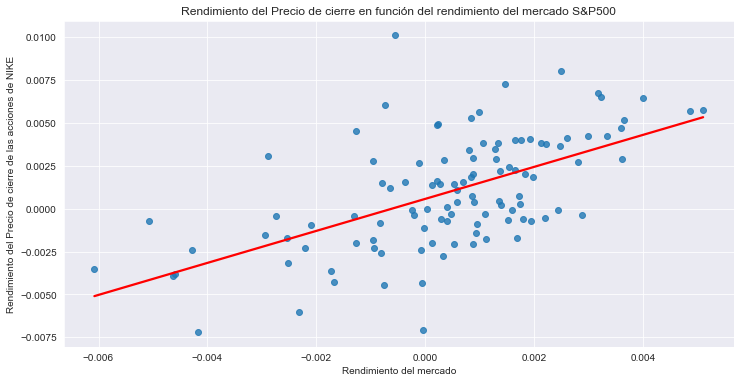

In [92]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

sns.regplot(y=y_train['rendimientosNIKE'], 
            x=X_train['rendimientos'], 
            ci=None, 
            line_kws={"color": "red"})

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimiento del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [93]:
# Training data
pred_train = lm.predict(y_train)
rmse_train = mean_squared_error(X_train, pred_train, squared=False)

# Test data
pred_test = lm.predict(y_test)
rmse_test =mean_squared_error(X_test, pred_test, squared=False)

# Save model results
model_results_lm = pd.DataFrame(
    {
    "model": "Linear Model (lm)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test],
    })
model_results_lm

/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- rendimientosNIKE
Feature names seen at fit time, yet now missing:
- rendimientos

  warnings.warn(message, FutureWarning)
/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- rendimientosNIKE
Feature names seen at fit time, yet now missing:
- rendimientos

  warnings.warn(message, FutureWarning)


,model,rmse_train,rmse_test
0,Linear Model (lm),0.002704,0.0029


### 2.3.1.2. POLYNOMIAL REGRESSION

In [94]:
from sklearn.preprocessing import PolynomialFeatures
# polynomial degree 2

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [95]:
pm = LinearRegression()
pm.fit(X_train_poly,y_train)

LinearRegression()

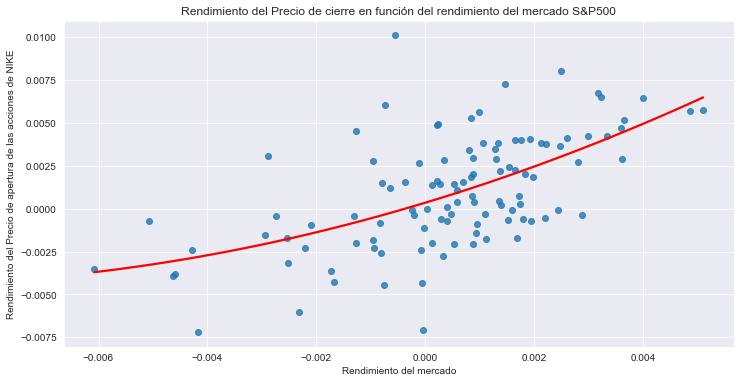

In [96]:
#Gráfico
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura
# plot
sns.regplot(y=y_train['rendimientosNIKE'], 
            x=X_train['rendimientos'], 
            ci=None, 
            order=2, 
            line_kws={"color": "red"});
plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimiento del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de apertura de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [97]:
# Obtener los coeficientes del modelo
coeficientes_polynomial = pm.coef_

print(coeficientes_polynomial)

[[ 0.          0.95740851 47.95626698]]


In [98]:
# Training data

pred_train = pm.predict(X_train_poly) 
rmse_train = mean_squared_error(y_train, 
                                pred_train, 
                                squared=False)

# Test data
pred_test = pm.predict(X_test_poly)
rmse_test =mean_squared_error(y_test, 
                              pred_test, 
                              squared=False)

# Save model results
model_results_pm = pd.DataFrame(
    {
    "model": "Polynomial Model (pm)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test],
    })

results = pd.concat([model_results_lm, model_results_pm], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.002704,0.002900
0,Polynomial Model (pm),0.002639,0.003275


### 2.3.1.3. CUBIC SPLINES

In [99]:
from patsy import dmatrix
# Generación de spline cúbico con 3 nudos a 25, 50 y 75
knots = np.percentile(X_train, [25, 50, 75])
transformed_x = dmatrix(
            "bs(train, knots=knots, degree=3, include_intercept=False)", 
                {"train": X_train},return_type='dataframe') 

In [100]:
transformed_x.head()

,Intercept,"bs(train, knots=knots, degree=3, include_intercept=False)[0]","bs(train, knots=knots, degree=3, include_intercept=False)[1]","bs(train, knots=knots, degree=3, include_intercept=False)[2]","bs(train, knots=knots, degree=3, include_intercept=False)[3]","bs(train, knots=knots, degree=3, include_intercept=False)[4]","bs(train, knots=knots, degree=3, include_intercept=False)[5]"
135,1.0,0.001236,0.147633,0.807875,0.043255,0.000000,0.000000
77,1.0,0.000000,0.000000,0.435957,0.503459,0.060577,0.000007
18,1.0,0.336901,0.465945,0.154630,0.000000,0.000000,0.000000
48,1.0,0.000000,0.000000,0.276676,0.552315,0.167153,0.003855
4,1.0,0.332709,0.468532,0.157857,0.000000,0.000000,0.000000


In [101]:
import statsmodels.api as sm
# Ajuste del modelo lineal generalizado en el conjunto de datos transformado
cs = sm.GLM(y_train, transformed_x).fit() 

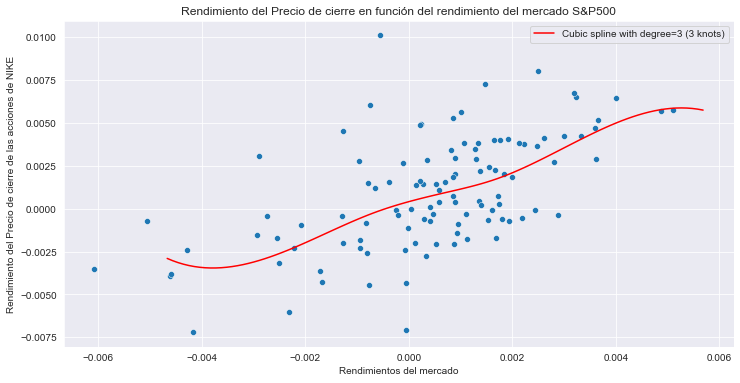

In [102]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

# Create observations
xp = np.linspace(X_test.min(),X_test.max(), 100) 
# Make some predictions
pred = cs.predict(dmatrix("bs(xp, knots=knots, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# plot
sns.scatterplot(y=y_train['rendimientosNIKE'], x=X_train['rendimientos'])

plt.plot(xp, pred, label='Cubic spline with degree=3 (3 knots)', color='red')
plt.legend();

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimientos del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [103]:
coeficientes_cubic_spline = cs.params

beta_rendimientos = coeficientes_cubic_spline
print("Beta para rendimientos:", beta_rendimientos)

Beta para rendimientos: Intercept                                                      -0.002898
bs(train, knots=knots, degree=3, include_intercept=False)[0]   -0.001803
bs(train, knots=knots, degree=3, include_intercept=False)[1]    0.002206
bs(train, knots=knots, degree=3, include_intercept=False)[2]    0.003759
bs(train, knots=knots, degree=3, include_intercept=False)[3]    0.005174
bs(train, knots=knots, degree=3, include_intercept=False)[4]    0.009477
bs(train, knots=knots, degree=3, include_intercept=False)[5]    0.008647
dtype: float64


In [104]:
# Training data

pred_train = cs.predict(dmatrix("bs(train, knots=knots, include_intercept=False)", {"train": X_train}, return_type='dataframe'))#### CAMBIO ####
rmse_train = mean_squared_error(y_train, pred_train, squared=False) 

# Test data
pred_test = cs.predict(dmatrix("bs(test, knots=knots, include_intercept=False)", {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_cs = pd.DataFrame(
    {
    "model": "Cubic spline (cs)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test]
    })
results = pd.concat([results, model_results_cs], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.002704,0.002900
0,Polynomial Model (pm),0.002639,0.003275
0,Cubic spline (cs),0.002627,0.003195


### 2.3.1.4. NATURAL CUBIC SPLINES

In [105]:
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')#### CAMBIO ####

ncs = sm.GLM(y_train, transformed_x3).fit()

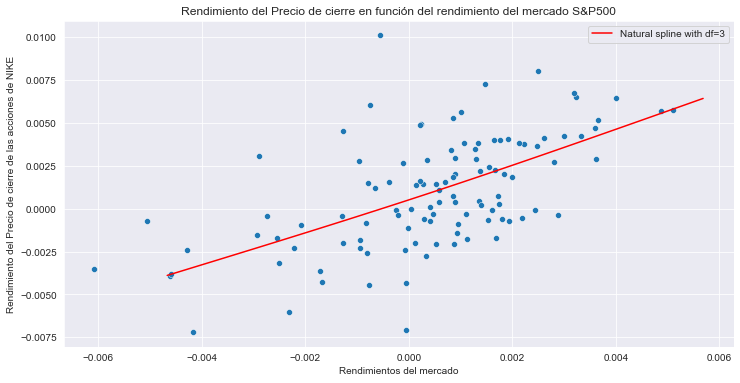

In [106]:
sns.set_style('darkgrid') # Establece el estilo de trazado como 'darkgrid'
plt.figure(figsize=(12,6)) # Establece el tamaño de la figura

# Make predictions
pred = ncs.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# plot
sns.scatterplot(y=y_train['rendimientosNIKE'], x=X_train['rendimientos'])
plt.plot(xp, pred, color='red', label='Natural spline with df=3')
plt.legend();

plt.title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500') # Establece el título del gráfico
plt.xlabel('Rendimientos del mercado') # Establece la etiqueta del eje x
plt.ylabel('Rendimiento del Precio de cierre de las acciones de NIKE') # Establece la etiqueta del eje y

plt.show() # Muestra el gráfico

In [107]:
# Obtener los coeficientes estimados (betas)
coeficientes_beta = ncs.params

print(coeficientes_beta)

Intercept             0.000889
cr(train, df=3)[0]   -0.004778
cr(train, df=3)[1]    0.000128
cr(train, df=3)[2]    0.005540
dtype: float64


In [108]:
# Training data

pred_train = ncs.predict(dmatrix("cr(train, df=3)", {"train": X_train}, return_type='dataframe'))
rmse_train = mean_squared_error(y_train, pred_train, squared=False) 

# Test data
pred_test = ncs.predict(dmatrix("cr(test, df=3)", {"test": X_test}, return_type='dataframe'))
rmse_test =mean_squared_error(y_test, pred_test, squared=False)

# Save model results
model_results_ncs = pd.DataFrame(
    {
    "model": "Natural cubic spline (ncs)",  
    "rmse_train": [rmse_train], 
    "rmse_test": [rmse_test]
    })

results = pd.concat([results, model_results_ncs], axis=0)
results

,model,rmse_train,rmse_test
0,Linear Model (lm),0.002704,0.002900
0,Polynomial Model (pm),0.002639,0.003275
0,Cubic spline (cs),0.002627,0.003195
0,Natural cubic spline (ncs),0.002639,0.003192


## 2.3.2. CONCLUSION

Aquí está la interpretación de los resultados:

-Linear Model (lm): En el conjunto de entrenamiento, este modelo de regresión lineal tiene un RMSE de aproximadamente 0.0027, y en el conjunto de prueba, el RMSE es de alrededor de 0.0029. Esto sugiere que el modelo es capaz de predecir los rendimientos mensuales con alta precisión.

-Polynomial Model (pm): Este modelo de regresión polinómica muestra un rendimiento similar al modelo lineal. Tiene un RMSE de alrededor de 0.0026 en el conjunto de entrenamiento y 0.0033 en el conjunto de prueba. El modelo parece generalizar bien a nuevos datos, pero el aumento en el RMSE en el conjunto de prueba podría indicar una ligera sobreajuste.

-Cubic spline (cs): El modelo de spline cúbico tiene un rendimiento sólido en este conjunto de datos. El RMSE es de aproximadamente 0.0026 en el conjunto de entrenamiento y 0.0032 en el conjunto de prueba. Esto indica que el modelo es capaz de capturar patrones mensuales en los rendimientos.

-Natural cubic spline (ncs): Al igual que el modelo polinómico y el modelo de spline cúbico, el modelo de spline cúbico natural tiene un RMSE similar. El RMSE es de aproximadamente 0.0026 tanto en el conjunto de entrenamiento como en el conjunto de prueba.

En resumen, todos los modelos muestran un excelente rendimiento en la predicción de los rendimientos mensuales. La diferencia en los RMSE entre los modelos es pequeña, lo que indica que tienen una capacidad similar para generalizar a nuevos datos mensuales.

In [ ]:
Betas del modelo CAMP
Diario:
    Regresión lineal: 0.97676669
    Regresion polinomial: 0.          0.96650273 -0.87630216
    Spline Cubico:
        Beta para rendimientos: Intercept                      -0.129421
bs(train, knots=knots, degree=3, include_intercept=False)[0]    0.051376
bs(train, knots=knots, degree=3, include_intercept=False)[1]    0.084563
bs(train, knots=knots, degree=3, include_intercept=False)[2]    0.130674
bs(train, knots=knots, degree=3, include_intercept=False)[3]    0.158496
bs(train, knots=knots, degree=3, include_intercept=False)[4]    0.212098
bs(train, knots=knots, degree=3, include_intercept=False)[5]    0.157214

    Spline Cubico natural:
        Intercept    -0.013106
cr(train, df=3)[0]   -0.121161
cr(train, df=3)[1]    0.014107
cr(train, df=3)[2]    0.093948

semanal:
    Regresión lineal:1.03487586
    Regresion polinomial:0.         1.04355283 3.51666375
    Spline Cubico:
        Beta para rendimientos: Intercept                      -0.025581
bs(train, knots=knots, degree=3, include_intercept=False)[0]    0.013911
bs(train, knots=knots, degree=3, include_intercept=False)[1]    0.014242
bs(train, knots=knots, degree=3, include_intercept=False)[2]    0.027075
bs(train, knots=knots, degree=3, include_intercept=False)[3]    0.029533
bs(train, knots=knots, degree=3, include_intercept=False)[4]    0.043980
bs(train, knots=knots, degree=3, include_intercept=False)[5]    0.039007
    Spline Cubico natural:
        Intercept            -0.001384
cr(train, df=3)[0]   -0.022092
cr(train, df=3)[1]    0.002136
cr(train, df=3)[2]    0.018572

mensual:
    Regresión lineal:0.93270286
    Regresion polinomial:0.          0.95740851 47.95626698
    Spline Cubico:
        Beta para rendimientos: Intercept                      -0.002898
bs(train, knots=knots, degree=3, include_intercept=False)[0]   -0.001803
bs(train, knots=knots, degree=3, include_intercept=False)[1]    0.002206
bs(train, knots=knots, degree=3, include_intercept=False)[2]    0.003759
bs(train, knots=knots, degree=3, include_intercept=False)[3]    0.005174
bs(train, knots=knots, degree=3, include_intercept=False)[4]    0.009477
bs(train, knots=knots, degree=3, include_intercept=False)[5]    0.008647
        
    Spline Cubico natural:
        Intercept     0.000889
cr(train, df=3)[0]   -0.004778
cr(train, df=3)[1]    0.000128
cr(train, df=3)[2]    0.005540